<a href="https://colab.research.google.com/github/Nishpowale/Twitter-Sentiment-Analysis-_Covid-19-/blob/main/Twitter_SentimentAnalysis_Covid19_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import re
from textblob import TextBlob
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
 
# downloading
nltk.download('stopwords')

# hiding warnings
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

# setting the style

sns.set_style('darkgrid')
# displaying more information
pd.set_option('display.max_rows', 120)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


This data set is composed of tweets which are collected using Twitter API and a Python script.

All tweets are obtained from the #covid19

Analaysis of the public opinion amidst the Corovanavirus global pandemic.



#Exploaratory Data Analysis 

In [5]:
df_search = pd.read_csv('covid19_tweets.csv')
df_search.head(5)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥ☻լꂅϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624,950,18775,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile 🇺🇸,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253,1677,24,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [6]:
df_search.tail()

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False
179105,BEEHEMOTH ⏳,🇨🇦 Canada,⚒️ The Architects of Free Trade ⚒️ Really Did ...,2016-07-13 17:21:59,1623,2160,98000,False,2020-08-29 19:44:15,@CTVNews A powerful painting by Juan Lucena. I...,NaN,Twitter Web App,False
179106,Gary DelPonte,New York City,"Global UX UI Visual Designer. StoryTeller, Mus...",2009-10-27 17:43:13,1338,1111,0,False,2020-08-29 19:44:14,"More than 1,200 students test positive for #CO...",['COVID19'],Twitter for iPhone,False
179107,TUKY II,"Aliwal North, South Africa",TOKELO SEKHOPA | TUKY II | LAST BORN | EISH TU...,2018-04-14 17:30:07,97,1697,566,False,2020-08-29 19:44:08,I stop when I see a Stop\n\n@SABCNews\n@Izinda...,NaN,Twitter for Android,False


In [7]:
df_search['Tweets'] = df_search['text'] 
df_search['User'] = df_search['user_name'] 
df_search['Date'] = df_search['date'] 
#Renaming the useful columns 

In [8]:
df=df_search[['User','Date','Tweets']].copy()
df.head()

,User,Date,Tweets
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...
2,Time4fisticuffs,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...
3,ethel mertz,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...


In [9]:
df.describe(include='object')#O here means object 

,User,Date,Tweets
count,179108,179108,179108
unique,92276,136611,178683
top,GlobalPandemic.NET,2020-08-06 16:00:00,"The incompetence of this administration, and t..."
freq,679,26,13


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179108 entries, 0 to 179107
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   User    179108 non-null  object
 1   Date    179108 non-null  object
 2   Tweets  179108 non-null  object
dtypes: object(3)
memory usage: 4.1+ MB


In [11]:
#Checking if any null values are present
df.isnull().sum()

User      0
Date      0
Tweets    0
dtype: int64

In [12]:
#Constructuin a function for Cleaning the data set using regular expressions 
def cleantext(text):
 text = re.sub('@[A-Za-z0–9]+', '', text) #Removing @mentions
 text = re.sub('#', '', text) # Removing '#'
 text = re.sub('RT[\s]+', '', text) # Removing RT
 text = re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
 
 return text

In [13]:
df['Tweets'] = df['Tweets'].apply(cleantext)
df.head()

,User,Date,Tweets
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey and - wouldn't it have made more sense ...
2,Time4fisticuffs,2020-07-25 12:27:14,3443 Trump never once claimed COVID19 was a ...
3,ethel mertz,2020-07-25 12:27:10,The one gift COVID19 has give me is an apprec...
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel CoronaVirusU...


In [14]:
df_f=df[:2000]

In [15]:
df_f['Subjectivity'] = df_f['Tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.subjectivity)
df_f['Polarity'] = df_f['Tweets'].apply(lambda tweet: TextBlob(tweet).sentiment.polarity)

df_f.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,User,Date,Tweets,Subjectivity,Polarity
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,0.250000,-0.25
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey and - wouldn't it have made more sense ...,0.500000,0.50
2,Time4fisticuffs,2020-07-25 12:27:14,3443 Trump never once claimed COVID19 was a ...,0.000000,0.00
3,ethel mertz,2020-07-25 12:27:10,The one gift COVID19 has give me is an apprec...,0.357143,0.00
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel CoronaVirusU...,0.000000,0.00


- - - - - - - - - - - - - -- - - - - - - - - - - -- - - - - -- - - - - -- - - - - - - -- 


#<...Pre Processing ....>

In [16]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
 
# downloading
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
all_tweets = " ".join(d for d in df['Tweets'])

stopwords = set(STOPWORDS)


####A stop word is a commonly used word (such as “the”, “a”, “an”, “in”) that a search engine has been programmed to ignore, both when indexing entries for searching and when retrieving them as the result of a search query. 

In [18]:
print(all_tweets[0:1000])# Checking the result after applying stop words 

If I smelled the scent of hand sanitizers today on someone in the past, I would think they were so intoxicated that…  Hey   and  - wouldn't it have made more sense to have the players pay their respects to the A…  3443   Trump never once claimed COVID19 was a hoax. We all claim that this effort to…   The one gift COVID19 has give me is an appreciation for the simple things that were always around me…  25 July : Media Bulletin on Novel CoronaVirusUpdates COVID19 
69   …  coronavirus covid19 deaths continue to rise. It's almost  as bad as it ever was.  Politicians and businesses want…  How COVID19 Will Change Work in General (and recruiting, specifically) via/  Recruiting…  You now have to wear face coverings when out shopping - this includes a visit to your local Community Pharmacy…  Praying for good health and recovery of  .
covid19
covidPositive POPE AS GOD - Prophet Sadhu Sundar Selvaraj. Watch here at  

HurricaneHanna COVID19…  49K+ Covid19 cases still no response from 
29  .Please

#<...Word Cloud..>

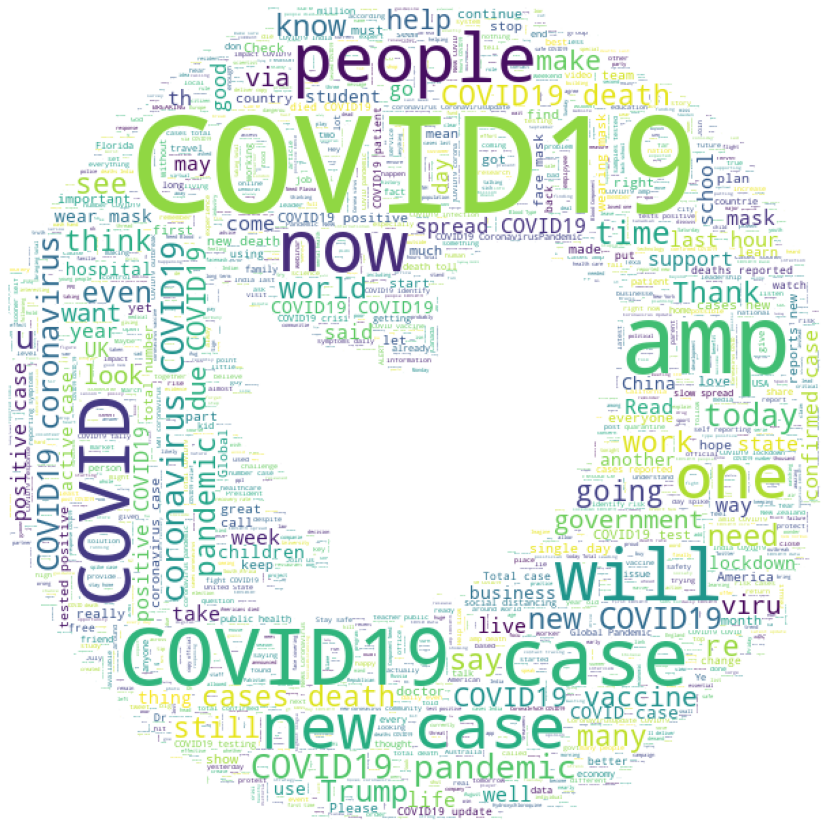

In [19]:
twitter_mask=np.array(Image.open('twitterlogo.jpg'))

wordcloud=WordCloud(stopwords=stopwords,mask=twitter_mask,width=1000,height=1000,max_words=3000,
                    max_font_size=250,min_font_size=1,background_color='white',collocations='False').generate(all_tweets)

figure,ax=plt.subplots(figsize=(15,15));
ax.imshow(wordcloud, interpolation='bilinear');
ax.set_axis_off();

plt.imshow(wordcloud);

_____
##Filtering out Posititve and Negative Tweets

In [20]:
df_f.head(1)

,User,Date,Tweets,Subjectivity,Polarity
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,0.25,-0.25


In [33]:
def analysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'
df_f['Analysis']=df_f['Polarity'].apply(analysis)
df_f.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,User,Date,Tweets,Subjectivity,Polarity,Analysis
0,ᏉᎥ☻լꂅϮ,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,0.250000,-0.25,Negative
1,Tom Basile 🇺🇸,2020-07-25 12:27:17,Hey and - wouldn't it have made more sense ...,0.500000,0.50,Positive
2,Time4fisticuffs,2020-07-25 12:27:14,3443 Trump never once claimed COVID19 was a ...,0.000000,0.00,Neutral
3,ethel mertz,2020-07-25 12:27:10,The one gift COVID19 has give me is an apprec...,0.357143,0.00,Neutral
4,DIPR-J&K,2020-07-25 12:27:08,25 July : Media Bulletin on Novel CoronaVirusU...,0.000000,0.00,Neutral


In [37]:
print('We now print out the positive tweets amidst the Covid 19 Pandemic ')
print()

sortedDF = df_f.sort_values(by=['Polarity'])
count=1
for i in range (0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i]== 'Positive':
    print(str(count) +')'+ '' +df_f['Tweets'][i])
    print()
    count+=1



We now print out the positive tweets amidst the Covid 19 Pandemic 

1)Hey   and  - wouldn't it have made more sense to have the players pay their respects to the A… 

2)How COVID19 Will Change Work in General (and recruiting, specifically) via/  Recruiting… 

3)Praying for good health and recovery of  .
covid19
covidPositive

4)👋🏻  — no one will be safe from COVID19 until everyone is safe. Will you commit to ensure… 

5)Let's all protect ourselves from COVID19.
It's real and the numbers are climbing up fast in the Continent.
Let's n… 

6)Second wave of COVID19 in Flanders..back to more homework again... 

7)COVID Update: The infection rate in Florida is following the natural curve that experts predicted if the initial cu… 

8)  Good Patriots!
Call to Volunteer to be an Election Judge. 
Polls cannot open without… 

9)The first comprehensive review of WASH &amp; COVID19.

Analysis: key ways in which WASH can help reduce transmission… 

10)TNCoronaUpdate

TN crosses 2 lakh mark and 1,50,0